# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [1]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [2]:
np_vector = df.values.transpose()
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.06417    0.33     ]
 [ 0.16602   -0.0084448  0.33     ]
 [ 0.50408    0.098609   0.5      ]
 [-0.63563    0.97851    0.       ]
 [-0.63486    0.92308    0.       ]]


min:-0.999560, max:0.997750, median:-0.036787, mean:-0.033911, std:0.581712, size:2000


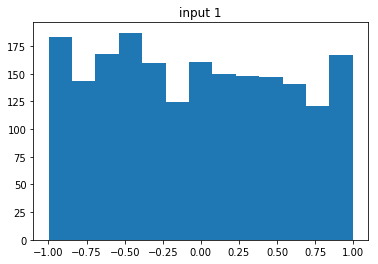

min:-0.999790, max:0.999340, median:-0.008641, mean:-0.007416, std:0.577141, size:2000


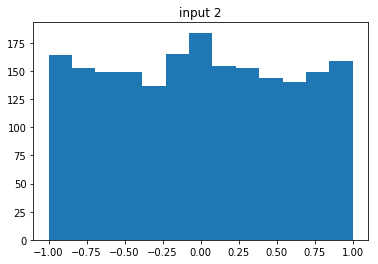

min:-0.500000, max:0.830000, median:0.000000, mean:0.034030, std:0.265202, size:2000


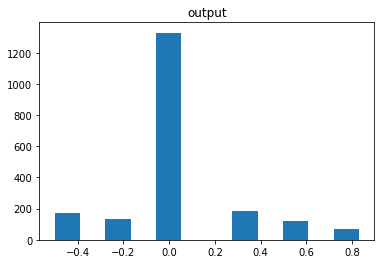

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np_vector[:, 0]
y = np_vector[:, 1]
tk = np_vector[:,2]

def explore_vector(vector, title=None):
    assert type(vector) is np.ndarray
    assert vector.ndim == 1
    print('min:%f, max:%f, median:%f, mean:%f, std:%f, size:%d' 
          % (np.min(vector), np.max(vector), np.median(vector), np.mean(vector), np.std(vector), vector.size))
    plt.title(title)
    plt.hist(vector, bins='auto')
    plt.show()

explore_vector(x, "input 1")
explore_vector(y, "input 2")
explore_vector(tk, "output")

## Data Preparation

In [4]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[-0.4162   0.92103  0.     ]
 [ 0.29745 -0.4905   0.     ]
 [-0.38455  0.62683  0.     ]
 [-0.23446  0.59664  0.     ]
 [-0.13784 -0.17219 -0.17   ]]


In [5]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[-0.4162   0.92103]
 [ 0.29745 -0.4905 ]
 [-0.38455  0.62683]
 [-0.23446  0.59664]
 [-0.13784 -0.17219]]
output shape:(2000,)
[ 0.    0.    0.    0.   -0.17]


In [6]:
pct_training = 0.9
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1620, Validation Size: 180, Test Size: 200
train_in shape:(1620, 2)


# Model Construction

In [20]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

model.summary()

# custom metrics
import keras.backend as K

def max_diff(y_true, y_pred):
    return K.max(K.abs(y_pred-y_true))

def min_diff(y_true, y_pred):
    return K.min(K.abs(y_pred-y_true))

# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=[max_diff, min_diff])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
__________

In [21]:
history = model.fit(train_in,
                    train_out,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1620 samples, validate on 180 samples
Epoch 1/100
1620/1620 [==============================] - 1s 322us/step - loss: 0.0568 - max_diff: 0.6450 - min_diff: 0.0072 - val_loss: 0.0448 - val_max_diff: 0.4863 - val_min_diff: 0.0029
Epoch 2/100
1620/1620 [==============================] - 0s 102us/step - loss: 0.0375 - max_diff: 0.4735 - min_diff: 0.0051 - val_loss: 0.0333 - val_max_diff: 0.4177 - val_min_diff: 0.0043
Epoch 3/100
1620/1620 [==============================] - 0s 109us/step - loss: 0.0288 - max_diff: 0.4182 - min_diff: 0.0039 - val_loss: 0.0273 - val_max_diff: 0.3909 - val_min_diff: 0.0040
Epoch 4/100
1620/1620 [==============================] - 0s 95us/step - loss: 0.0251 - max_diff: 0.4101 - min_diff: 0.0032 - val_loss: 0.0243 - val_max_diff: 0.3756 - val_min_diff: 0.0019
Epoch 5/100
1620/1620 [==============================] - 0s 97us/step - loss: 0.0222 - max_diff: 0.3824 - min_diff: 0.0041 - val_loss: 0.0288 - val_max_diff: 0.4123 - val_min_diff: 0.0064
Epoch 6/10

Epoch 44/100
1620/1620 [==============================] - 0s 108us/step - loss: 0.0078 - max_diff: 0.2816 - min_diff: 0.0017 - val_loss: 0.0087 - val_max_diff: 0.2807 - val_min_diff: 0.0042
Epoch 45/100
1620/1620 [==============================] - 0s 108us/step - loss: 0.0071 - max_diff: 0.2901 - min_diff: 0.0022 - val_loss: 0.0092 - val_max_diff: 0.2942 - val_min_diff: 7.2557e-04
Epoch 46/100
1620/1620 [==============================] - 0s 99us/step - loss: 0.0078 - max_diff: 0.3017 - min_diff: 0.0016 - val_loss: 0.0073 - val_max_diff: 0.2688 - val_min_diff: 8.3248e-04
Epoch 47/100
1620/1620 [==============================] - 0s 105us/step - loss: 0.0071 - max_diff: 0.2926 - min_diff: 0.0016 - val_loss: 0.0059 - val_max_diff: 0.2303 - val_min_diff: 6.0991e-04
Epoch 48/100
1620/1620 [==============================] - 0s 105us/step - loss: 0.0066 - max_diff: 0.2791 - min_diff: 0.0015 - val_loss: 0.0148 - val_max_diff: 0.3141 - val_min_diff: 0.0058
Epoch 49/100
1620/1620 [===============

1620/1620 [==============================] - 0s 101us/step - loss: 0.0043 - max_diff: 0.2447 - min_diff: 7.4265e-04 - val_loss: 0.0058 - val_max_diff: 0.2796 - val_min_diff: 4.8476e-04
Epoch 87/100
1620/1620 [==============================] - 0s 101us/step - loss: 0.0048 - max_diff: 0.2577 - min_diff: 9.9242e-04 - val_loss: 0.0079 - val_max_diff: 0.3175 - val_min_diff: 0.0032
Epoch 88/100
1620/1620 [==============================] - 0s 109us/step - loss: 0.0048 - max_diff: 0.2516 - min_diff: 6.7690e-04 - val_loss: 0.0051 - val_max_diff: 0.2527 - val_min_diff: 6.4515e-04
Epoch 89/100
1620/1620 [==============================] - 0s 98us/step - loss: 0.0042 - max_diff: 0.2480 - min_diff: 7.1650e-04 - val_loss: 0.0048 - val_max_diff: 0.2455 - val_min_diff: 7.0461e-04
Epoch 90/100
1620/1620 [==============================] - 0s 97us/step - loss: 0.0040 - max_diff: 0.2430 - min_diff: 7.6550e-04 - val_loss: 0.0072 - val_max_diff: 0.3057 - val_min_diff: 3.1050e-04
Epoch 91/100
1620/1620 [=====

In [22]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_max_diff', 'val_min_diff', 'loss', 'max_diff', 'min_diff'])

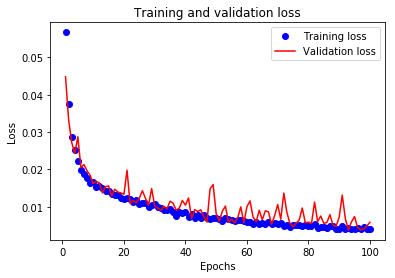

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

max_diff = history.history['max_diff']
val_max_diff = history.history['val_max_diff']

min_diff = history.history['min_diff']
val_min_diff = history.history['val_min_diff']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

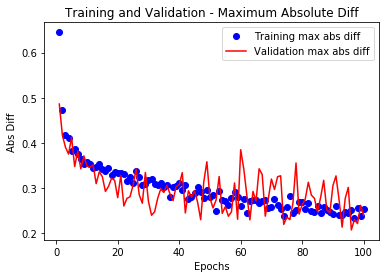

In [24]:
plt.clf()   # clear figure
plt.plot(epochs, max_diff, 'bo', label='Training max abs diff')
plt.plot(epochs, val_max_diff, 'r', label='Validation max abs diff')
plt.title('Training and Validation - Maximum Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs Diff')
plt.legend()

plt.show()

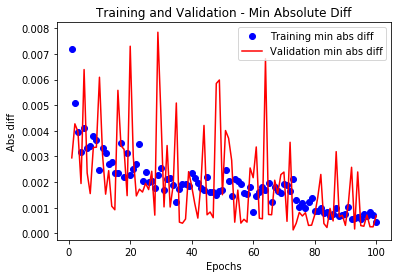

In [25]:
plt.clf()   # clear figure
plt.plot(epochs, min_diff, 'bo', label='Training min abs diff')
plt.plot(epochs, val_min_diff, 'r', label='Validation min abs diff')
plt.title('Training and Validation - Min Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs diff')
plt.legend()

plt.show()

## Model Evaluation

In [26]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

200/200 [==============================] - 0s 46us/step


[0.01284478910267353, 0.39011034309864046, 0.00042618462815880776]

In [27]:
pre_test_out = model.predict(test_in)
pre_test_out = pre_test_out.flatten()

min:-0.519741, max:0.802350, median:-0.012184, mean:0.006081, std:0.240245, size:200


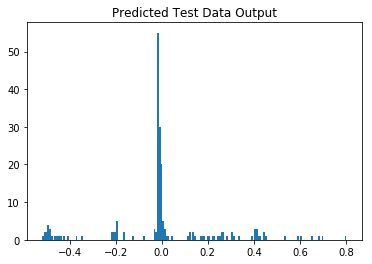

In [28]:
explore_vector(pre_test_out, 'Predicted Test Data Output')

min:-0.500000, max:0.830000, median:0.000000, mean:0.054200, std:0.267765, size:200


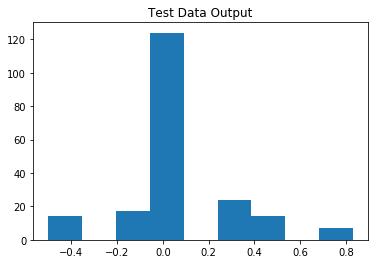

In [29]:
explore_vector(test_out, 'Test Data Output')

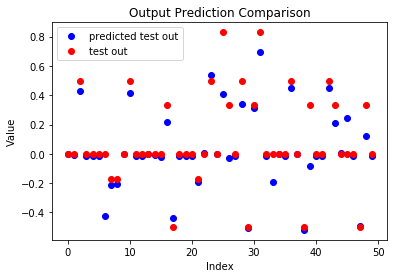

In [30]:
plt.clf()   # clear figure
NUM_PLOT = 50
plt.plot(pre_test_out[:NUM_PLOT], 'bo', label='predicted test out')
plt.plot(test_out[:NUM_PLOT], 'ro', label='test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
#plt.rcParams['figure.figsize'] = [20, 20]
#plt.figure(figsize=(20, 20), dpi= 20)
plt.show()

min:0.000108, max:0.568748, median:0.015709, mean:0.058212, std:0.097243, size:200


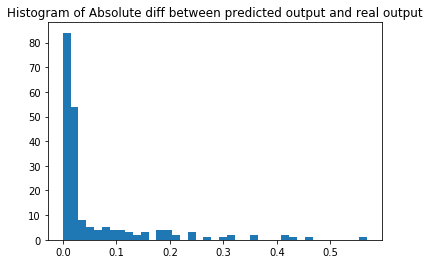

In [31]:
abs_diff_test_out = abs(pre_test_out - test_out)
plt.clf()   # clear figure
explore_vector(abs_diff_test_out, 'Histogram of Absolute diff between predicted output and real output')

Text(0, 0.5, 'Abs Diff')

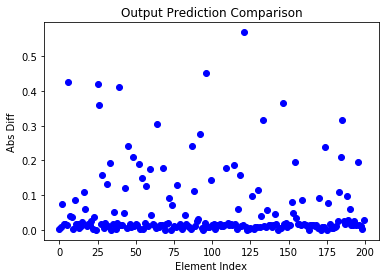

In [32]:
plt.clf()   # clear figure
plt.plot(abs_diff_test_out, 'bo', label='abs diff test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Element Index')
plt.ylabel('Abs Diff')
